$\sigma_i^2=\left\langle(v_i-\langle v_i\rangle)^2\right\rangle=\left\langle v_i^2-\langle v_i\rangle^2\right\rangle$
2ter Term entspricht np.std()^2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys
sys.path.insert(0, '/home/sophia/bachelor_thesis_ipython_notebooks')

from Paolo_class import GCphasespace

%matplotlib inline

In [3]:
### import data of simulation w/ IMBH ###
if 0:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
elif 1:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)
else:
    r_3d,v_r,v_t,x,y,z,vx,vy,vz,vr,vtheta,vphi=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,2,3,30,31,32,33,34,35,36,37,38), unpack=True)

In [4]:
### import data of simulation w/o IMBH ###
if 0:
    r_3d_wo,m1_wo,m2_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo=np.loadtxt('C:\\Users\Sophia Milanov\Documents\Bachelorarbeit\data\\x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)
elif 1:
    r_3d_wo,x_wo,y_wo,z_wo,vx_wo,vy_wo,vz_wo,vr_wo,vtheta_wo,vphi_wo=np.loadtxt('/home/sophia/Dokumente/Bachelorarbeit-2/x-y-z_sophia_neu.dat', usecols=(1,29,30,31,32,33,34,35,36,37), unpack=True)
else:
    r_3d,m1,m2,x,y,z,vx,vy,vz=np.loadtxt('/home/milanov/Bachelorarbeit/x-y-z.dat', usecols=(1,9,10,30,31,32,33,34,35), unpack=True)

In [5]:
### 
bh=GCphasespace(r_3d,bin_num=50)
wobh=GCphasespace(r_3d_wo,bin_num=50)

9372.54


In [6]:
R_bh=bh.mean_distance(r_3d)
vel_disp_bh=bh.velocity_dispersion(vr,vtheta,vphi)
beta_bh=bh.anisotropy_param(vr,vtheta,vphi)

R_wobh=wobh.mean_distance(r_3d_wo)
vel_disp_wobh=wobh.velocity_dispersion(vr_wo,vtheta_wo,vphi_wo)
beta_wobh=wobh.anisotropy_param(vr_wo,vtheta_wo,vphi_wo)

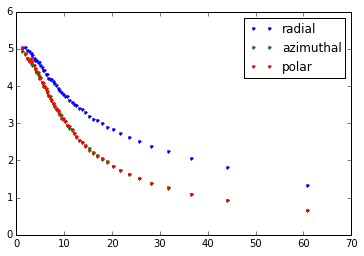

In [7]:
plt.plot(R_wobh,vel_disp_wobh[0],'.',label='radial')

plt.plot(R_wobh,vel_disp_wobh[1],'.',label='azimuthal')
plt.plot(R_wobh,vel_disp_wobh[2],'.',label='polar')
plt.legend()

In [8]:
#ueberpruefe, ob Daten anhand der Entfernung sortiert sind, Ergebnis=0 bedeutet ja
r_sort=np.sort(r_3d)
rest=r_3d-r_sort
print(np.sum(rest))

0.0


In [9]:
#Definitionen von allem

stars=len(r_3d)
bin_num=50
spb=stars/bin_num+1

#fuer velocity dispersion
sigrad_r3d=np.zeros(bin_num)
sigtan_r3d=np.zeros(bin_num)
sigrad_r3d_neu=np.zeros(bin_num)
sigtheta_r3d=np.zeros(bin_num)
sigphi_r3d=np.zeros(bin_num)

#fuer Fehlerbalken
sigraderr=np.zeros(bin_num)
sigthetaerr=np.zeros(bin_num)
sigphierr=np.zeros(bin_num)

#fuer mean velocities
meantan_r3d=np.zeros(bin_num)
meanrad_r3d=np.zeros(bin_num)
meanrad_r3d_neu=np.zeros(bin_num)
meantheta_r3d=np.zeros(bin_num)
meanphi_r3d=np.zeros(bin_num)

beta=np.zeros(bin_num)

R=np.zeros(bin_num)
Rerr=np.zeros(bin_num)

In [10]:
#berechne Standardabweichung der rad. vel. in Bins mit immer gleichen Anzahl an Sternen und die durchschnittliche Entfernung
for n in range(bin_num):
    R[n]=np.mean(r_3d[n*spb:(n+1)*spb]) #berechnet mittlere Entfernung der Sterne in einem bin
    #Rerr[n]=stats.sem(R[n],ddof=0)
    sigrad_r3d[n]=np.std(v_r[n*spb:(n+1)*spb]) #vel. disp Wert der ursprunglichen radial velocity
    sigtan_r3d[n]=np.std(v_t[n*spb:(n+1)*spb]) #vel disp Wert der urspruenglichen tangential velocity
    sigrad_r3d_neu[n]=np.std(vr[n*spb:(n+1)*spb]) #vel disp Wert der neuen radial velocity
    sigtheta_r3d[n]=np.std(vtheta[n*spb:(n+1)*spb]) #vel disp Wert der theta velocity
    sigphi_r3d[n]=np.std(vphi[n*spb:(n+1)*spb]) #vel disp Wert der phi velocity
    sigraderr[n]=sigrad_r3d_neu[n]/np.sqrt(2*spb) #Fehler der radialen Standardabweichung
    sigthetaerr[n]=sigtheta_r3d[n]/np.sqrt(2*spb) #Fehler der azimuthalen Standardabweichung
    sigphierr[n]=sigphi_r3d[n]/np.sqrt(2*spb) #Fehler der polaren Standardabweichung
    meantan_r3d[n]=np.mean(v_t[n*spb:(n+1)*spb]) #mean wert der urspruenglichen radial velocity
    meanrad_r3d[n]=np.mean(v_r[n*spb:(n+1)*spb]) #mean wert der urspruenglichen tangential velocity
    meanrad_r3d_neu[n]=np.mean(vr[n*spb:(n+1)*spb]) #mean Wert der neuen radial velocity
    meantheta_r3d[n]=np.mean(vtheta[n*spb:(n+1)*spb]) #mean Wert der theta velocity
    meanphi_r3d[n]=np.mean(vphi[n*spb:(n+1)*spb]) #mean Wert der phi velocity
    beta[n]=1-(sigtheta_r3d[n]**2+sigphi_r3d[n]**2)/(2*sigrad_r3d_neu[n]**2) #anisotropy parameter beta
    #print(len(r_3d[n*spb+1:(n+1)*spb+1]),R[n])

bisschen Theorie
--
Die Kurve der tangential velocity dispersion sollte etwa zweimal so hoch sein wie die der radialen. Die tangentialgechwindigkeit wird ueber die winkelgeschwindigkeiten berechnet $\left(v_t=\sqrt{v_\theta^2+v_\phi^2}\right)$. Bei isotropen Galaxien und Kugelsternhaufen und sowas sollte gelten: $\sigma_r^2=\sigma_\theta^2=\sigma_\phi^2$.=, wodurch die tangential velocity dispersion doppelt so gross sein sollte wie die radiale. die mean motion der einzelnen Geschwindigkeiten sollte 0 ergeben, sonst waere das Objekt instabil, wenn $<v_r>\neq0$ bzw haette turbulenzen wenn $<v_t>\neq0$. hier ist das fuer mean tangential velocity nicht gegeben. dies liegt daran, dass vorher ueber theta und phi geschwindigkeit addiert wurde. also erstmal jede Komponente einzeln berechnen!

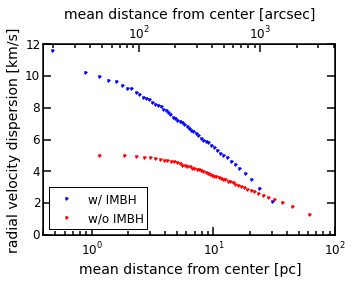

In [16]:
#plt.title('intrinsic radial velocity dispersion with '+str(bin_num)+' steps')

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#ax1.grid(True)
ax1.semilogx(R_bh,vel_disp_bh[0],'b.',label='w/ IMBH')
ax1.semilogx(R_wobh,vel_disp_wobh[0],'r.',label='w/o IMBH')
#ax1.errorbar(R,sigrad_r3d_neu,sigraderr,fmt='.')
ax1.legend(loc=3,numpoints=1)
ax1.set_xlim(0.4,100)
ax1.set_xlabel('mean distance from center [pc]',fontsize=14)
ax1.set_ylabel('radial velocity dispersion [km/s]',fontsize=14)

ax2.set_xlim((0.4/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(which='minor',length=4,width=1.5)

fig.tight_layout()
plt.show()
fig.savefig('Plots/radial_velocity_dispersion.pdf',format='pdf')

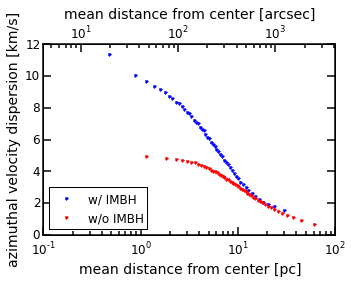

In [18]:
#plt.title('intrinsic azimuthal velocity dispersion with '+str(bin_num)+' steps')


fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
#ax1.grid(True)

ax1.semilogx(R_bh,vel_disp_bh[1],'b.',label='w/ IMBH')
ax1.semilogx(R_wobh,vel_disp_wobh[1],'r.',label='w/o IMBH')

ax1.legend(loc=3,numpoints=1)

#ax1.errorbar(R,sigtheta_r3d,sigthetaerr,fmt='.')
ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]',fontsize=14)
ax1.set_ylabel('azimuthal velocity dispersion [km/s]',fontsize=14)

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()


plt.show()
fig.savefig('Plots/azimuthal_velocity_dispersion.pdf',format='pdf')

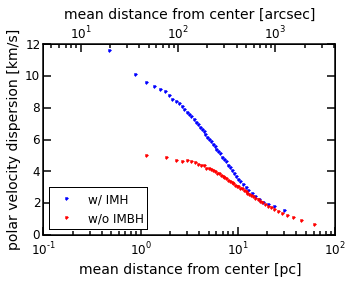

In [19]:
#plt.title('intrinsic polar velocity dispersion with '+str(bin_num)+' steps')


fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
#ax1.grid(True)

#ax1.semilogx(R,sigphi_r3d,'.')
ax1.semilogx(R_bh,vel_disp_bh[2],'b.',label='w/ IMH')
ax1.semilogx(R_wobh,vel_disp_wobh[2],'r.',label='w/o IMBH')
#ax1.errorbar(R,sigphi_r3d,sigphierr,fmt='.')
ax1.legend(loc=3,numpoints=1)

ax1.set_xlim(0.1,100)
ax1.set_xlabel('mean distance from center [pc]',fontsize=14)
ax1.set_ylabel('polar velocity dispersion [km/s]',fontsize=14)

ax2.set_xlim((0.1/5000)*360*3600/(2*np.pi),(100./5000)*360*3600/(2*np.pi))
ax2.set_xscale('log')
ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

plt.show()

fig.savefig('Plots/polar_velocity_dispersion.pdf',format='pdf')

In [ ]:
plt.semilogx(R,meanrad_r3d_neu,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('mean radial velocity [km/s]')
plt.title('intrinsic mean radial velocity with '+str(bin_num)+' steps')
#plt.savefig('Plots/3d mean radial velocity with '+str(bin_num)+' steps')

In [ ]:
plt.semilogx(R,meantheta_r3d,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('mean azimuthal velocity [km/s]')
plt.title('intrinsic mean azimuthal velocity with '+str(bin_num)+' steps')
#plt.savefig('Plots/3d mean azimuthal velocity with '+str(bin_num)+' steps')

In [ ]:
plt.semilogx(R,meanphi_r3d,'.')
plt.xlabel('mean distance from center [pc]')
plt.ylabel('mean ploar velocity [km/s]')
plt.title('intrinsic mean polar velocity with '+str(bin_num)+' steps')
#plt.savefig('Plots/3d mean polar velocity with '+str(bin_num)+' steps')

Anisotropy parameter beta 
---
$$\beta\equiv1-\frac{\sigma_\theta^2+\sigma_\phi^2}{2\sigma_r^2}$$

Quelle: Binney&Tremaine 2008 eq. (4.61)

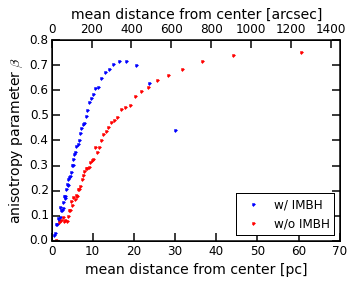

In [20]:
#anisotropy parameter beta

fig = plt.figure(figsize=(5,4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

#ax1.grid(True)

ax1.plot(R_bh,beta_bh,'b.',label='w/ IMBH')
ax1.plot(R_wobh,beta_wobh,'r.',label='w/o IMBH')
ax1.set_xlabel('mean distance from center [pc]',fontsize=14)
ax1.set_ylabel('anisotropy parameter $\\beta$',fontsize=14)

ax1.legend(loc=4,numpoints=1)

ax2.set_xlim((0./5000)*360*3600/(2*np.pi),(35./5000)*360*3600/(2*np.pi))
ax2.set_xlabel('mean distance from center [arcsec]',fontsize=14)

ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

ax1.tick_params(length=8,width=1.5,labelsize=12)
ax2.tick_params(length=8,width=1.5,labelsize=12)
ax1.tick_params(which='minor',length=4,width=1.5)
ax2.tick_params(which='minor',length=4,width=1.5)
fig.tight_layout()

fig.savefig('Plots/anisotropy_parameter_beta.pdf', format='pdf')